# Collaboration and Competition



### 1. Imports

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md), [NumPy](http://www.numpy.org/), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/).

In [1]:
import torch
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from maddpg_agent import MADDPG_Agent
import pandas as pd
from typing import List

### 2. Instantiate the Environment and Agent and Explore the State and Action Spaces

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
# Load environment
env = UnityEnvironment(file_name="Tennis.app")

# Instantiate the MADDPG agent
agent = MADDPG_Agent(env, seed=3)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 3. Train the Agent with MADDPG

In [3]:
def maddpg(agent_: MADDPG_Agent, solution_score: float = 0.5, n_episodes: int = 10000) -> List[float]:
    """ Train an agent for a number of episodes.

    :param agent_: MADDPG_Agent to be trained
    :param solution_score: score at which environment is considered solved
    :param n_episodes: number of episodes to train the MADDPG agent
    :return: list of scores, one per episode, max over all DDPG agents' scores for each episode
    """

    all_scores = []
    latest_scores = deque(maxlen=100)
    for i in range(n_episodes):
        score = agent_.train_for_episode()
        latest_scores.append(score)
        all_scores.append(score)

        # Print status updates
        print('\rEpisode {}\tAverage Score: {:.4f}'.format(i, np.mean(latest_scores)), end="")
        if i % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i, np.mean(latest_scores)))

        # Notify when environment is solved and save agent model parameters and score
        if np.mean(latest_scores) >= solution_score:
            print("\nEnvironment solved in {} episodes".format(i + 1))
            agent.save()  # Save local model weights
            np.save('scores.npy', np.array(all_scores))
            break

    return all_scores

scores = maddpg(agent)


Episode 0	Average Score: 0.0000
Episode 100	Average Score: 0.0097
Episode 200	Average Score: 0.0129
Episode 300	Average Score: 0.0029
Episode 400	Average Score: 0.0096
Episode 500	Average Score: 0.0114
Episode 600	Average Score: 0.0148
Episode 700	Average Score: 0.0098
Episode 800	Average Score: 0.0120
Episode 900	Average Score: 0.0100
Episode 1000	Average Score: 0.0100
Episode 1100	Average Score: 0.0317
Episode 1200	Average Score: 0.0258
Episode 1300	Average Score: 0.0249
Episode 1400	Average Score: 0.0485
Episode 1500	Average Score: 0.0506
Episode 1600	Average Score: 0.0720
Episode 1700	Average Score: 0.1003
Episode 1800	Average Score: 0.0960
Episode 1900	Average Score: 0.1071
Episode 2000	Average Score: 0.1296
Episode 2100	Average Score: 0.3865
Episode 2109	Average Score: 0.5043
Environment solved in 2110 episodes


### 4. Plot the Score

<IPython.core.display.Javascript object>


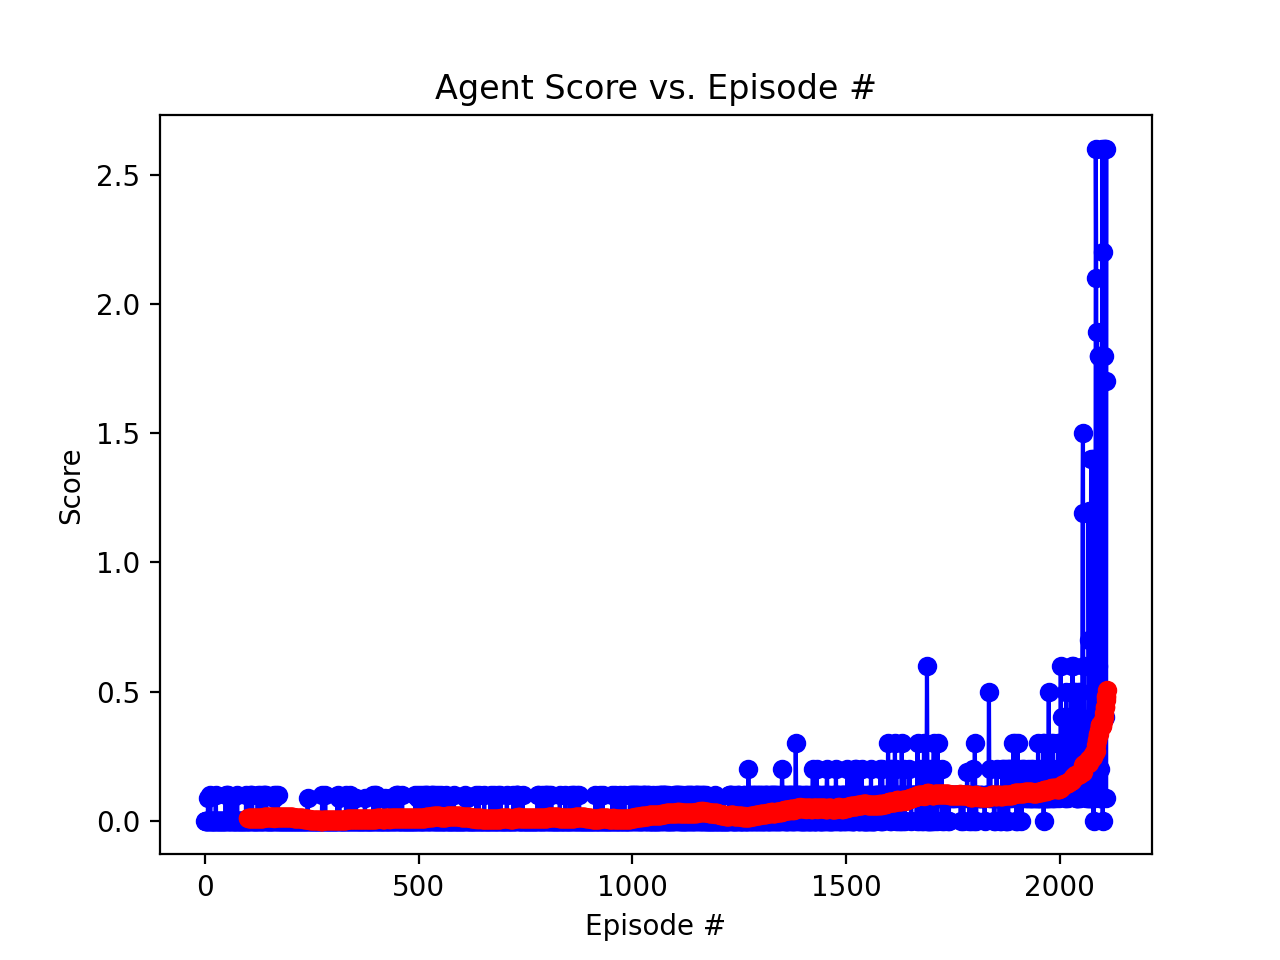

In [3]:
%matplotlib notebook

scores = np.load('scores.npy')

# Calculate rolling average of scores over specified window of episodes
window = 100
scores_w = pd.Series(scores).rolling(window=window).mean().iloc[window - 1:].values

# Plot all scores and rolling average of scores
plt.figure()
plt.plot(scores, color='b', marker='o', label='All Scores')
plt.plot(np.arange(len(scores_w)) + window, scores_w, color='r', marker='o', label='Average of Last {} Scores'.format(window))
plt.title('Agent Score vs. Episode #')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch the Trained Agent

Load the trained weights from the `solution` directory to watch the trained agent.

In [14]:
agent.load('solution')

In [21]:
n_episodes = 1

for _ in range(n_episodes):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations # get the current state (for each agent)
    scores = np.zeros((len(env_info.agents)))
    while True:
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        states = env_info.vector_observations      # get next state (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += np.array(env_info.rewards)                        # update the score (for each agent)
        if np.any(dones):                                  # reset environment
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.5450000083073974


### 6. Close environment 

In [5]:
env.close()
            